In [31]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime as dt
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
import math
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas import Grouper
from pandas.plotting import lag_plot
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6



In [2]:
#Quarter 1
dataset_2016_Q1 = pd.read_csv('Datasets/quarter1/Divvy_Trips_2016_Q1.csv')
#Quarter 2 
dataset_2016_04  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_04.csv')
dataset_2016_05  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_05.csv')
dataset_2016_06  = pd.read_csv('Datasets/quarter2/Divvy_Trips_2016_06.csv')
dataset_2016_Q2 = pd.concat([dataset_2016_04, dataset_2016_05, dataset_2016_06])
#Quarter 3 
dataset_2016_Q3 = pd.read_csv('Datasets/quarter3/Divvy_Trips_2016_Q3.csv')
#Quarter 4 
dataset_2016_Q4 = pd.read_csv('Datasets/quarter4/Divvy_Trips_2016_Q4.csv')


In [3]:
dataset_2016_Q1['starttime'] = pd.to_datetime(dataset_2016_Q1['starttime'],infer_datetime_format=True)
dataset_2016_Q1['stoptime'] = pd.to_datetime(dataset_2016_Q1['stoptime'],infer_datetime_format=True)
dataset_2016_Q2['starttime'] = pd.to_datetime(dataset_2016_Q2['starttime'],infer_datetime_format=True)
dataset_2016_Q2['stoptime']  = pd.to_datetime(dataset_2016_Q2['stoptime'],infer_datetime_format=True)
dataset_2016_Q3['starttime'] = pd.to_datetime(dataset_2016_Q3['starttime'],infer_datetime_format=True)
dataset_2016_Q3['stoptime']  = pd.to_datetime(dataset_2016_Q3['stoptime'],infer_datetime_format=True)
dataset_2016_Q4['starttime'] = pd.to_datetime(dataset_2016_Q4['starttime'],infer_datetime_format=True)
dataset_2016_Q4['stoptime']  = pd.to_datetime(dataset_2016_Q4['stoptime'],infer_datetime_format=True)

In [4]:
dataset_2016_full=pd.concat([dataset_2016_Q1,dataset_2016_Q2,dataset_2016_Q3,dataset_2016_Q4])

In [5]:
#Daywise checkout
data_2016 = pd.DataFrame(dataset_2016_full.groupby(dataset_2016_full['starttime'].dt.date).count()['trip_id'])
data_2016.columns = ['checkout']

In [6]:
#data_2016['pandas_SMA_3'] = data_2016.iloc[:,0].rolling(window=3).mean()

In [11]:
#Moving Average 
for i in range(0,data_2016.shape[0]-1):
    data_2016.loc[data_2016.index[i+1],'SMA_2'] = np.round(((data_2016.iloc[i,0]+ data_2016.iloc[i+1,0] )/2),1)
for i in range(0,data_2016.shape[0]-2):
    data_2016.loc[data_2016.index[i+2],'SMA_3'] = np.round(((data_2016.iloc[i,0]+ data_2016.iloc[i+1,0] +data_2016.iloc[i+2,0])/3),2)
for i in range(0,data_2016.shape[0]-3):
    data_2016.loc[data_2016.index[i+3],'SMA_4'] = np.round(((data_2016.iloc[i,0]+ data_2016.iloc[i+1,0] +data_2016.iloc[i+2,0]+data_2016.iloc[i+3,0])/4),3)

In [16]:
data_2016['pandas_SMA_7'] = data_2016.iloc[:,0].rolling(window=7).mean()
data_2016['pandas_SMA_12'] = data_2016.iloc[:,0].rolling(window=12).mean()
data_2016['pandas_SMA_30'] = data_2016.iloc[:,0].rolling(window=30).mean()
data_2016.to_excel("moving_average.xlsx")

# Moving Average for whole demand 

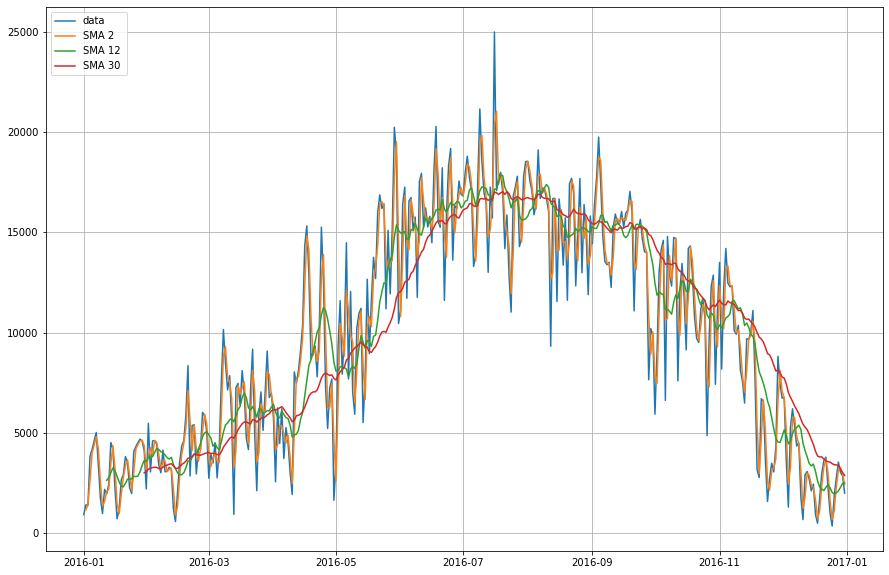

In [20]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(data_2016['checkout'],label='data')
plt.plot(data_2016['SMA_2'],label='SMA 2 ')
#plt.plot(data_2016['SMA_3'],label='SMA 3 ')
#plt.plot(data_2016['SMA_4'],label='SMA 4')
#plt.plot(data_2016['pandas_SMA_7'],label='SMA 7 ')
plt.plot(data_2016['pandas_SMA_12'],label='SMA 12 ')
plt.plot(data_2016['pandas_SMA_30'],label='SMA 30')
plt.legend(loc=2)

# Moving Average for popular station 
 

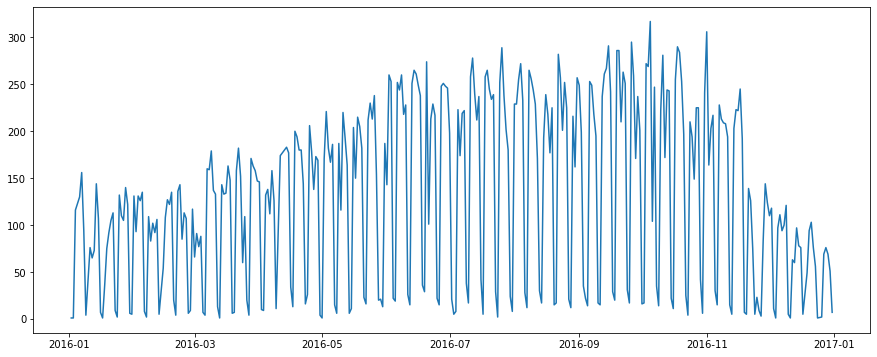

In [32]:
data_forstation91 = dataset_2016_full[(dataset_2016_full.from_station_id==91)]
data_s91 = pd.DataFrame(data_forstation91.groupby(data_forstation91['starttime'].dt.date).count()['trip_id'])
data_s91.columns = ['checkout']
#Fluctuations are more station level 
plt.plot(data_s91)

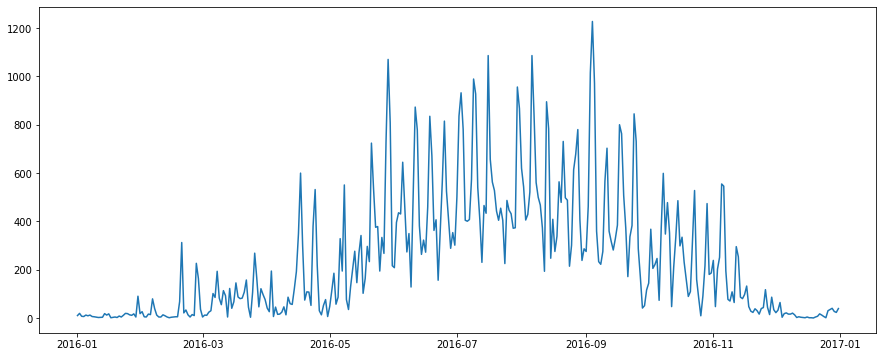

In [34]:
data_forstation35 = dataset_2016_full[(dataset_2016_full.from_station_id==35)]
data_s35 = pd.DataFrame(data_forstation35.groupby(data_forstation35['starttime'].dt.date).count()['trip_id'])
data_s35.columns = ['checkout']
#Fluctuations are more station level 
plt.plot(data_s35)

In [35]:
#Moving Average for station 35 
for i in range(0,data_s35.shape[0]-1):
    data_s35.loc[data_s35.index[i+1],'SMA_2'] = np.round(((data_s35.iloc[i,0]+ data_s35.iloc[i+1,0] )/2),1)
for i in range(0,data_s35.shape[0]-2):
    data_s35.loc[data_s35.index[i+2],'SMA_3'] = np.round(((data_s35.iloc[i,0]+ data_s35.iloc[i+1,0] +data_s35.iloc[i+2,0])/3),2)
for i in range(0,data_s35.shape[0]-3):
    data_s35.loc[data_s35.index[i+3],'SMA_4'] = np.round(((data_s35.iloc[i,0]+ data_s35.iloc[i+1,0] +data_s35.iloc[i+2,0]+data_s35.iloc[i+3,0])/4),3)

In [36]:
data_s35['pandas_SMA_7'] = data_s35.iloc[:,0].rolling(window=7).mean()
data_s35['pandas_SMA_12'] = data_s35.iloc[:,0].rolling(window=12).mean()
data_s35['pandas_SMA_30'] = data_s35.iloc[:,0].rolling(window=30).mean()
data_s35.to_excel("moving_averages35.xlsx")


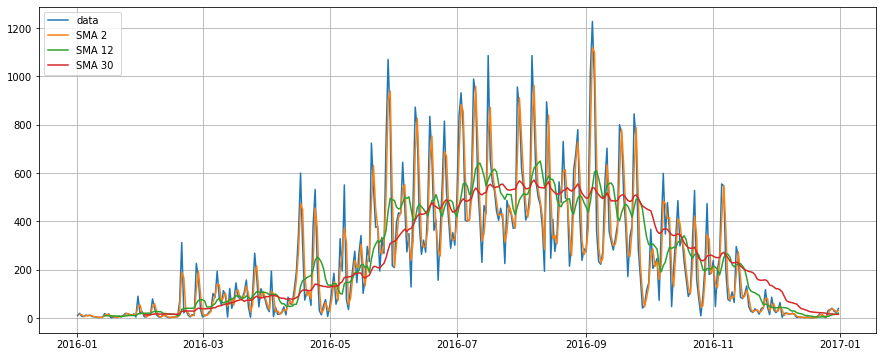

In [38]:
plt.grid(True)
plt.plot(data_s35['checkout'],label='data')
plt.plot(data_s35['SMA_2'],label='SMA 2 ')
#plt.plot(data_s35['SMA_3'],label='SMA 3 ')
#plt.plot(data_s35['SMA_4'],label='SMA 4')
#plt.plot(data_s35['pandas_SMA_7'],label='SMA 7 ')
plt.plot(data_s35['pandas_SMA_12'],label='SMA 12 ')
plt.plot(data_s35['pandas_SMA_30'],label='SMA 30')
plt.legend(loc=2)

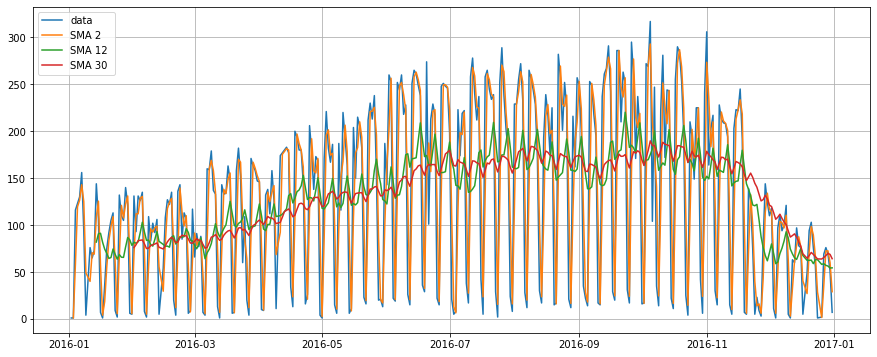

In [40]:
#Moving Average for station 91
for i in range(0,data_s91.shape[0]-1):
    data_s91.loc[data_s91.index[i+1],'SMA_2'] = np.round(((data_s91.iloc[i,0]+ data_s91.iloc[i+1,0] )/2),1)
for i in range(0,data_s91.shape[0]-2):
    data_s91.loc[data_s91.index[i+2],'SMA_3'] = np.round(((data_s91.iloc[i,0]+ data_s91.iloc[i+1,0] +data_s91.iloc[i+2,0])/3),2)
for i in range(0,data_s91.shape[0]-3):
    data_s91.loc[data_s91.index[i+3],'SMA_4'] = np.round(((data_s91.iloc[i,0]+ data_s91.iloc[i+1,0] +data_s91.iloc[i+2,0]+data_s91.iloc[i+3,0])/4),3)
    data_s91['pandas_SMA_7'] = data_s91.iloc[:,0].rolling(window=7).mean()
data_s91['pandas_SMA_12'] = data_s91.iloc[:,0].rolling(window=12).mean()
data_s91['pandas_SMA_30'] = data_s91.iloc[:,0].rolling(window=30).mean()
data_s91.to_excel("moving_averages91.xlsx")
plt.grid(True)
plt.plot(data_s91['checkout'],label='data')
plt.plot(data_s91['SMA_2'],label='SMA 2 ')
#plt.plot(data_s91['SMA_3'],label='SMA 3 ')
#plt.plot(data_s91['SMA_4'],label='SMA 4')
#plt.plot(data_s91['pandas_SMA_7'],label='SMA 7 ')
plt.plot(data_s91['pandas_SMA_12'],label='SMA 12 ')
plt.plot(data_s91['pandas_SMA_30'],label='SMA 30')
plt.legend(loc=2)

# Cumulative moving Average 


In [57]:
df_2016 = data_2016[['checkout']]
df_s35 = data_s35[['checkout']]
data_2016['CMA_4'] = df_2016.expanding(min_periods=4).mean()
data_s35['CMA_4'] = df_s35.expanding(min_periods=4).mean()

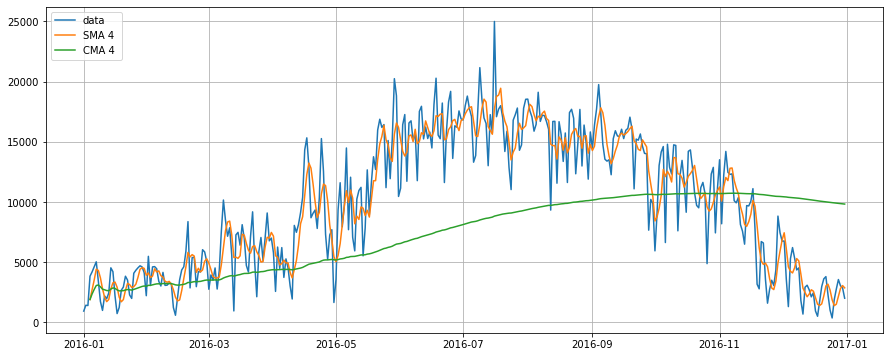

In [60]:
plt.grid(True)
plt.plot(data_2016['checkout'],label='data')
plt.plot(data_2016['SMA_4'],label='SMA 4 ')
plt.plot(data_2016['CMA_4'],label='CMA 4 ')
plt.legend(loc=2)

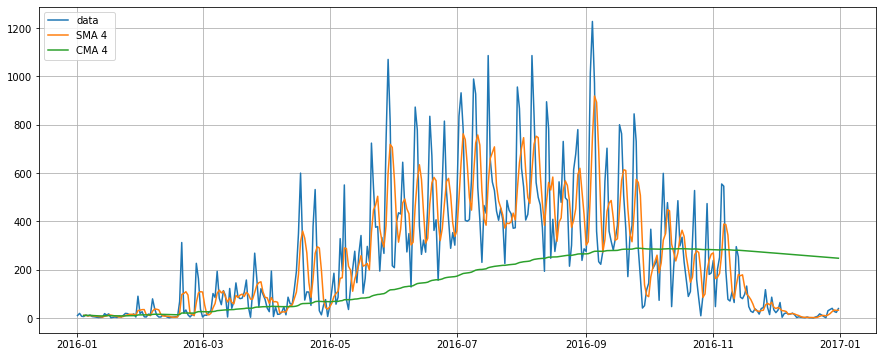

In [59]:
plt.grid(True)
plt.plot(data_s35['checkout'],label='data')
plt.plot(data_s35['SMA_4'],label='SMA 4 ')
plt.plot(data_s35['CMA_4'],label='CMA 4 ')
plt.legend(loc=2)

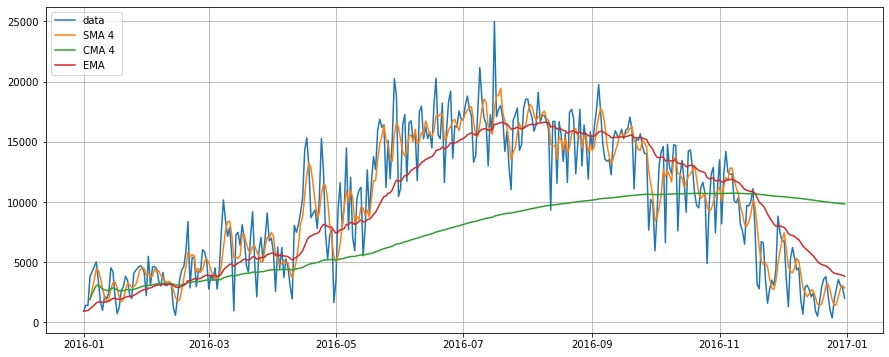

In [61]:
data_2016['EMA'] = data_2016.iloc[:,0].ewm(span=40,adjust=False).mean()
plt.grid(True)
plt.plot(data_2016['checkout'],label='data')
plt.plot(data_2016['SMA_4'],label='SMA 4 ')
plt.plot(data_2016['CMA_4'],label='CMA 4 ')
plt.plot(data_2016['EMA'],label='EMA ')
plt.legend(loc=2)